In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Exploratory Data Analysis

In [4]:
df=pd.read_csv("nyc_taxis_weather_jantoaug19s.csv")
df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,...,date,maxtemp,mintemp,avetemp,departuretemp,hdd,cdd,precipitation,newsnow,snowdepth
0,2019-01-17 18:30:40,2019-01-17 18:35:20,162,233,1.0,0.0,1.0,5.0,0.3,0.5,...,1/17/19,33.0,24.0,28.5,-3.7,36.0,0.0,0.00,0.0,0.0
1,2019-01-07 20:45:41,2019-01-07 21:10:25,186,75,1.0,0.0,0.5,19.5,0.3,0.5,...,1/7/19,34.0,25.0,29.5,-3.2,35.0,0.0,0.00,0.0,0.0
2,2019-01-29 10:00:49,2019-01-29 10:07:37,236,237,1.0,0.0,0.0,6.0,0.3,0.5,...,1/29/19,43.0,25.0,34.0,1.1,31.0,0.0,0.23,0.0,0.0
3,2019-01-10 05:54:57,2019-01-10 06:12:44,211,138,1.0,0.0,0.5,29.0,0.3,0.5,...,1/10/19,34.0,28.0,31.0,-1.4,34.0,0.0,0.00,0.0,0.0
4,2019-01-24 08:59:00,2019-01-24 09:12:27,233,170,1.0,0.0,0.0,9.0,0.3,0.5,...,1/24/19,59.0,35.0,47.0,14.5,18.0,0.0,1.33,0.0,0.0


In [5]:
df["pickup_datetime"]=pd.to_datetime(df['pickup_datetime'])
df["dropoff_datetime"]=pd.to_datetime(df['dropoff_datetime'])
df["date"]=pd.to_datetime(df['date'])

In [6]:
df.shape

(112480, 29)

Our data has 112,480 rows and 29 columns.

In [7]:
df.describe()

,PULocationID,DOLocationID,RatecodeID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,...,trip_duration_mins,maxtemp,mintemp,avetemp,departuretemp,hdd,cdd,precipitation,newsnow,snowdepth
count,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,...,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000,112480.000000
mean,162.710837,161.253165,1.052756,1.972424,1.069523,13.068938,0.299957,0.498031,1.571951,1.284299,...,17.901480,62.709468,48.408401,55.558935,0.568466,13.058108,3.868634,0.154170,0.059396,0.074644
std,65.930485,70.204930,0.669901,1.020099,1.237576,11.634544,0.003578,0.031317,1.223892,0.465248,...,71.228883,19.321813,18.013049,18.503470,6.782948,14.374985,5.924168,0.315305,0.374366,0.418558
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,14.000000,2.000000,9.000000,-24.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.000000,107.000000,1.000000,2.500000,0.000000,6.500000,0.300000,0.500000,1.000000,1.000000,...,6.680000,46.000000,34.000000,40.500000,-3.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,162.000000,162.000000,1.000000,2.500000,0.500000,9.500000,0.300000,0.500000,1.000000,1.000000,...,11.130000,66.000000,50.000000,56.500000,0.900000,8.000000,0.000000,0.000000,0.000000,0.000000
75%,233.000000,233.000000,1.000000,2.500000,2.500000,14.500000,0.300000,0.500000,2.000000,2.000000,...,18.200000,80.000000,65.000000,72.000000,4.600000,24.000000,7.000000,0.100000,0.000000,0.000000
max,265.000000,265.000000,99.000000,2.500000,17.500000,314.000000,0.300000,0.500000,6.000000,4.000000,...,1439.020000,95.000000,82.000000,88.500000,20.800000,56.000000,24.000000,1.820000,4.000000,4.000000


In [8]:
df.dtypes

pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
PULocationID                      int64
DOLocationID                      int64
RatecodeID                      float64
congestion_surcharge            float64
extra                           float64
fare_amount                     float64
improvement_surcharge           float64
mta_tax                         float64
passenger_count                 float64
payment_type                    float64
store_and_fwd_flag               object
tip_amount                      float64
tolls_amount                    float64
total_amount                    float64
trip_distance                   float64
pickup_dayofweek                  int64
trip_duration_mins              float64
date                     datetime64[ns]
maxtemp                         float64
mintemp                         float64
avetemp                         float64
departuretemp                   float64
hdd                             float64


C:\Users\ethan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


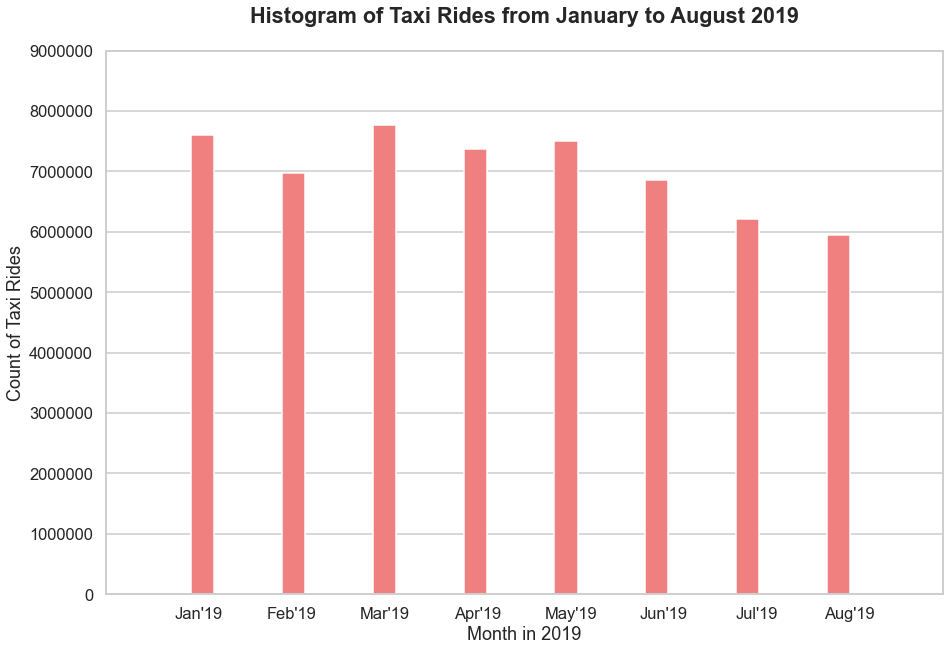

In [9]:
plt.figure(figsize=(15,10))
sns.set(context="talk", style="whitegrid", palette="bright")
g=sns.distplot(df["pickup_datetime"].dt.month, kde=False, hist_kws={"width":0.25,"align":"left","color":"lightcoral", 'alpha': 1})
g.xaxis.grid(b=False)
plt.xlim(0,9)
g.set_xticklabels(["","Jan'19","Feb'19","Mar'19","Apr'19","May'19","Jun'19","Jul'19","Aug'19"])
plt.yticks(g.get_yticks(), (g.get_yticks() * 1/0.002).astype(int))
plt.xlabel("Month in 2019")
plt.ylabel("Count of Taxi Rides")
plt.title("Histogram of Taxi Rides from January to August 2019", fontweight="bold", fontsize="large", y=1.04)
plt.show()

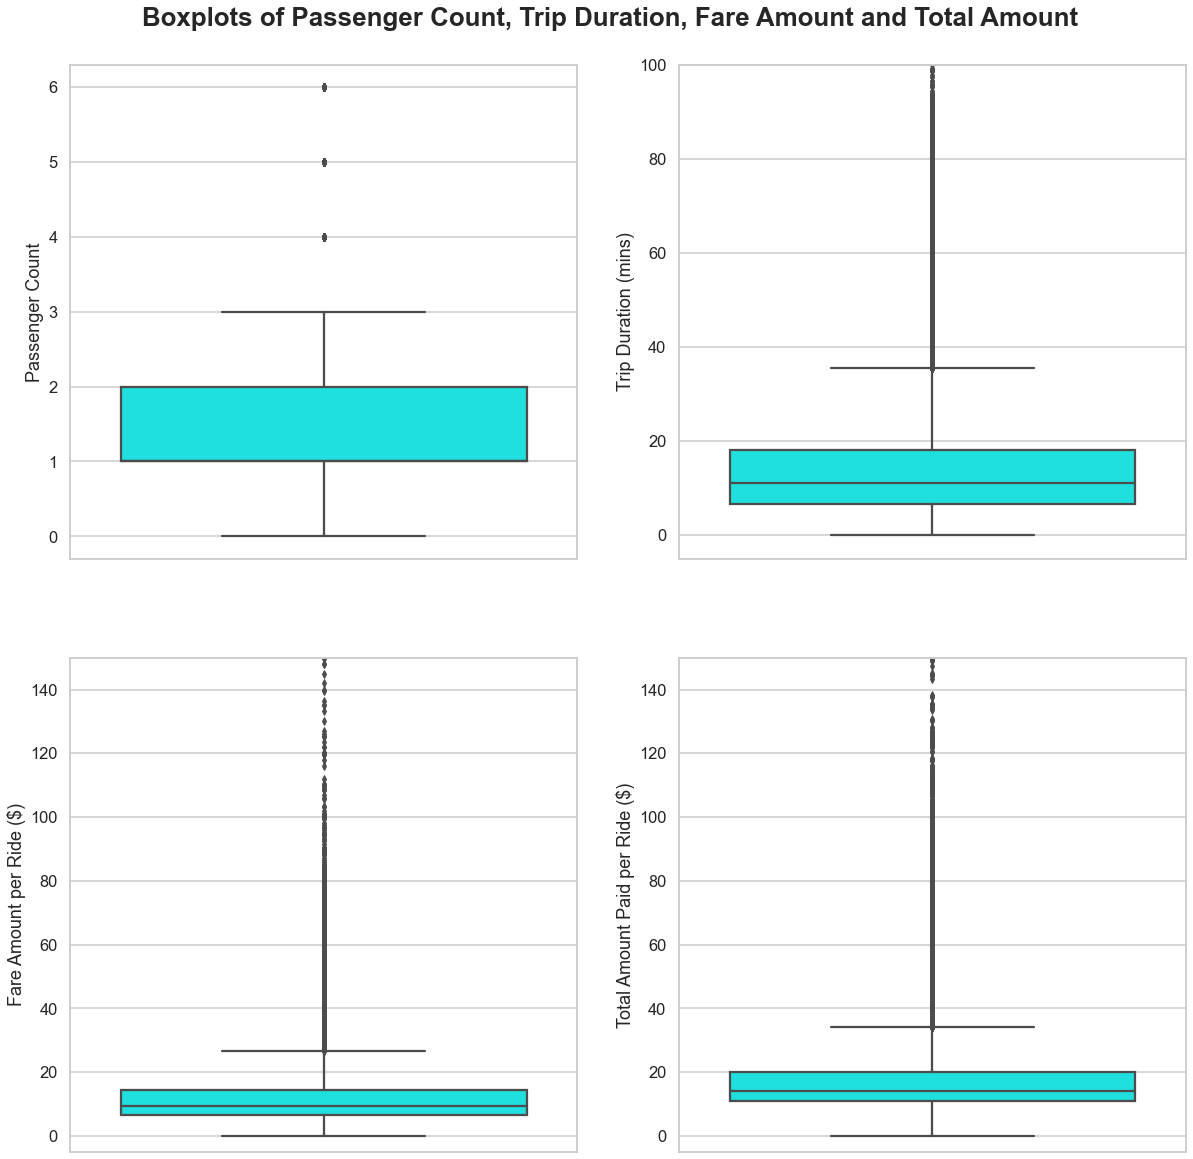

In [10]:
fig,axes=plt.subplots(2,2, figsize=(20,20))

a=sns.boxplot(y=df['passenger_count'], ax=axes[0,0],color="cyan").set(ylabel='Passenger Count')

sns.boxplot(y=df['trip_duration_mins'], ax=axes[0,1],color="cyan").set(ylabel='Trip Duration (mins)')
axes[0,1].set(ylim=(-5, 100))


sns.boxplot(y=df['fare_amount'], ax=axes[1,0],color="cyan").set(ylabel='Fare Amount per Ride ($)')
axes[1,0].set(ylim=(-5, 150))

sns.boxplot(y=df['total_amount'], ax=axes[1,1],color="cyan").set(ylabel='Total Amount Paid per Ride ($)')
axes[1,1].set(ylim=(-5, 150))

fig.suptitle('Boxplots of Passenger Count, Trip Duration, Fare Amount and Total Amount', fontsize="x-large", fontweight="bold", y=0.92)
plt.show()

## Feature Selection

First we will start to compare taxi ridership with all quantitative variables to see which variables have an acceptable corrrelation. 

In [11]:
trip_count_by_date_df = df.groupby("date")["pickup_datetime"].count()
trip_count_by_date_df = trip_count_by_date_df.to_frame(name="trip_count")
trip_count_by_date_df.reset_index(inplace=True)
trip_counts_df = trip_count_by_date_df.merge(df[["date","precipitation","newsnow","maxtemp","mintemp","avetemp","congestion_surcharge","extra","fare_amount",'trip_duration_mins',"departuretemp","passenger_count","snowdepth","tip_amount","total_amount","hdd","cdd","trip_distance"]], how="inner", on="date")
trip_counts_df.head()

,date,trip_count,precipitation,newsnow,maxtemp,mintemp,avetemp,congestion_surcharge,extra,fare_amount,trip_duration_mins,departuretemp,passenger_count,snowdepth,tip_amount,total_amount,hdd,cdd,trip_distance
0,2019-01-01,365,0.06,0.0,58.0,39.0,48.5,0.0,0.5,4.0,2.77,15.1,2.0,0.0,0.05,5.35,16.0,0.0,0.65
1,2019-01-01,365,0.06,0.0,58.0,39.0,48.5,0.0,0.0,52.0,41.28,15.1,1.0,0.0,5.00,57.80,16.0,0.0,18.48
2,2019-01-01,365,0.06,0.0,58.0,39.0,48.5,0.0,0.5,21.0,15.75,15.1,1.0,0.0,4.46,26.76,16.0,0.0,6.63
3,2019-01-01,365,0.06,0.0,58.0,39.0,48.5,0.0,0.0,14.0,18.58,15.1,1.0,0.0,0.00,14.80,16.0,0.0,2.99
4,2019-01-01,365,0.06,0.0,58.0,39.0,48.5,0.0,0.0,8.5,9.40,15.1,2.0,0.0,5.00,14.30,16.0,0.0,1.50


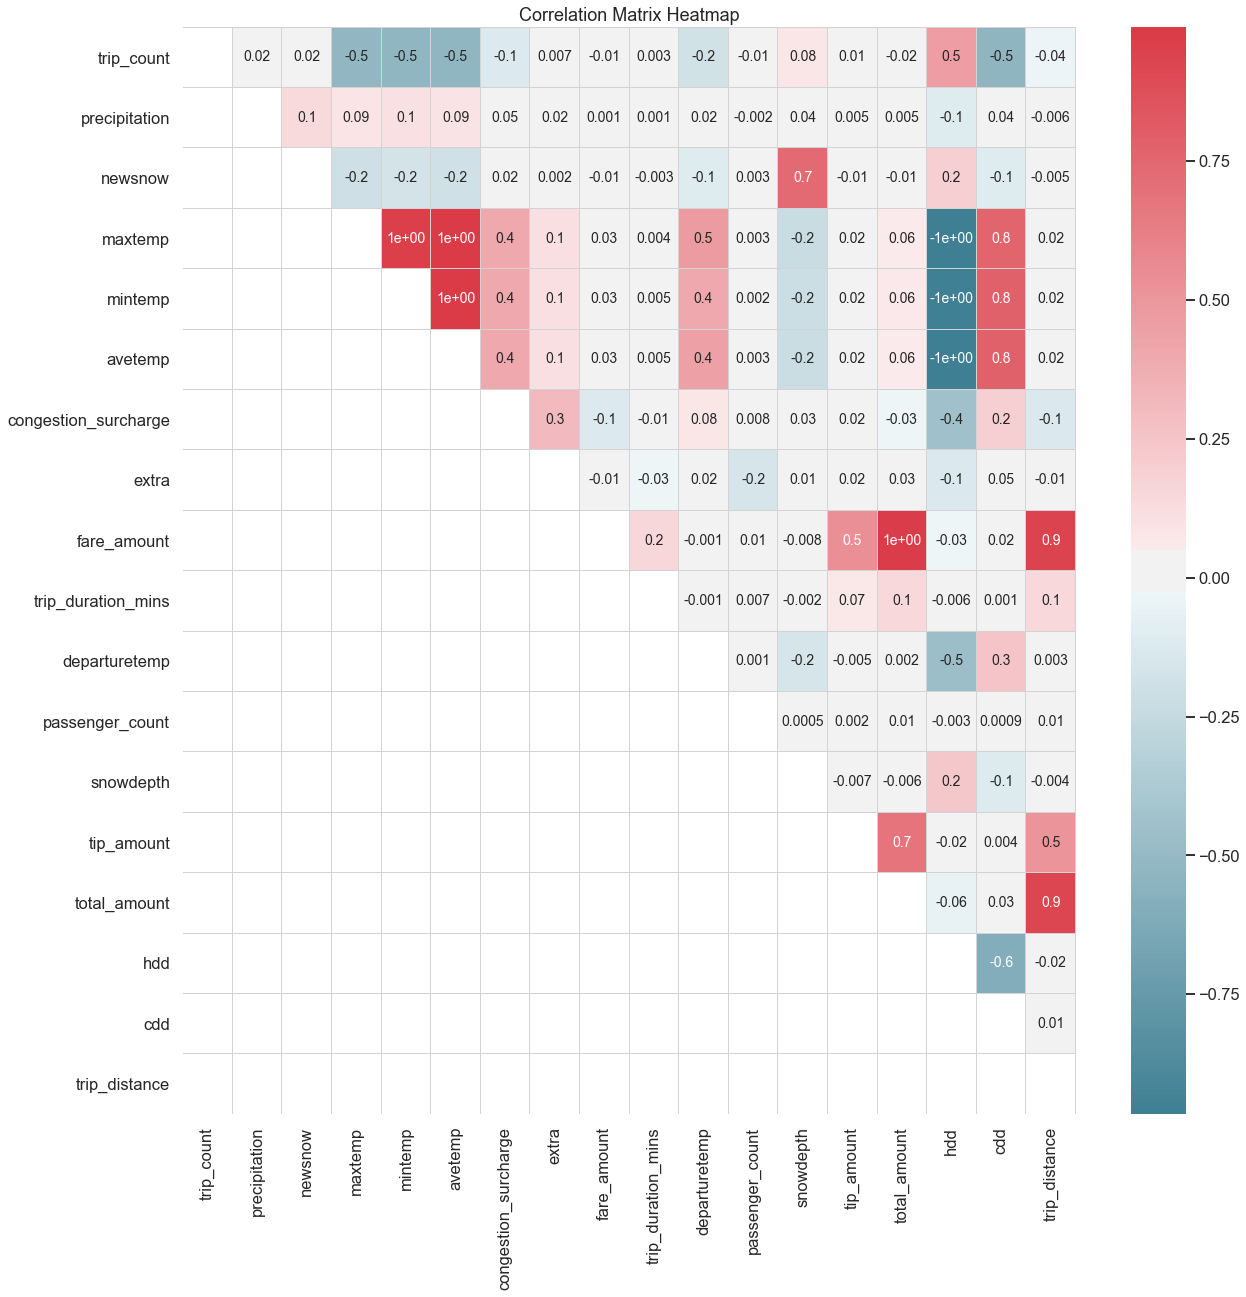

In [15]:
plt.figure(figsize=(20, 20))
mask = np.tril(trip_counts_df.corr())
ht = sns.heatmap(trip_counts_df.corr(),annot=True,annot_kws={"fontsize":14},fmt = '.1',  cmap=sns.diverging_palette(220, 10, as_cmap=True),  mask = mask, linewidths=0.2, linecolor='lightgray')
plt.title("Correlation Matrix Heatmap")
plt.show()

## How is Taxi Ridership Correlated with Weather?

Looking on this heatmap, we drop all the features that have close to negligible correlation the only explanatory variables correlated with `trip_count`:
- The daily minimum and maximum temperature (`mintemp`,`maxTemp`) 
- The daily average temperature (`avetemp`)
These variables are similar with one another so we chose to look at maxTemp and aveTemp.

We will proceed with some visualizations to better understand the strength and direction of the relationship between these explanatory variables and `trip_count`. 

In [16]:
trip_count_weather_by_date_df = trip_count_by_date_df.merge(df[["date","maxtemp","avetemp"]], how="inner", on="date")
trip_count_weather_by_date_df = trip_count_weather_by_date_df.groupby("date").first()
trip_count_weather_by_date_df.head()

,trip_count,maxtemp,avetemp
date,,,
2019-01-01,365,58.0,48.5
2019-01-02,374,40.0,37.5
2019-01-03,456,44.0,40.5
2019-01-04,460,47.0,41.0
2019-01-05,472,47.0,44.0


In [17]:
trip_count_weather_by_date_df.describe()

,trip_count,maxtemp,avetemp
count,243.000000,243.000000,243.000000
mean,462.880658,64.234568,57.047325
std,69.788747,19.367864,18.582039
min,220.000000,14.000000,9.000000
25%,419.500000,47.000000,40.750000
50%,469.000000,69.000000,61.000000
75%,517.500000,81.000000,73.500000
max,592.000000,95.000000,88.500000


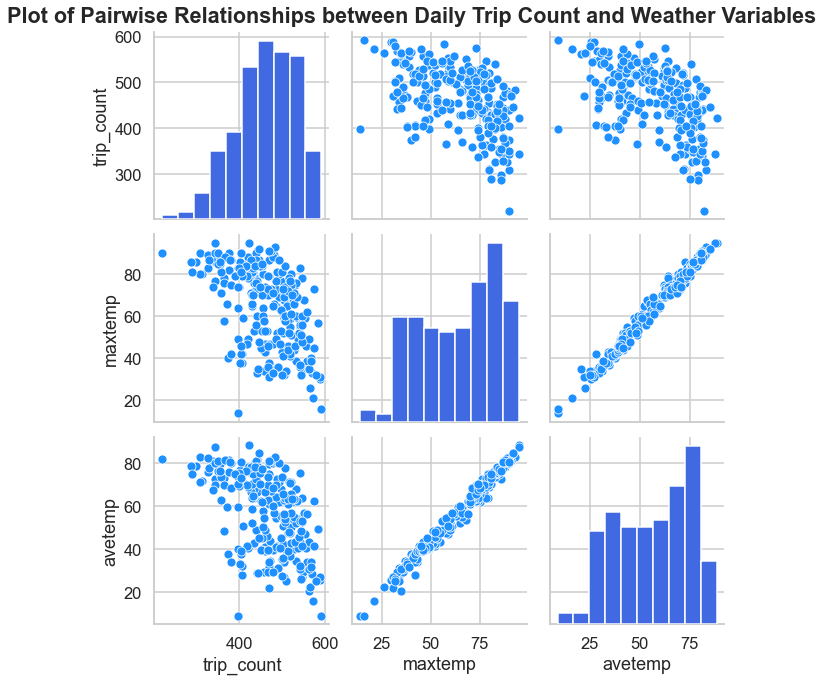

In [18]:
g=sns.pairplot(trip_count_weather_by_date_df, height=3, plot_kws={"color":"dodgerblue"}, diag_kws={"color":"royalblue"})
g.fig.suptitle("Plot of Pairwise Relationships between Daily Trip Count and Weather Variables", fontweight="bold", fontsize="large",y=1.03)
plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(15,15))
# sns.scatterplot(trip_count_weather_by_date_df["precipitation"],trip_count_weather_by_date_df["trip_count"]).set(ylabel='Daily Taxi Ridership', xlabel="Daily Precipitation (inches)")
# ax.set_yticklabels((ax.get_yticks() * 1/0.002).astype(int))
# plt.title("Scatterplot of Daily Taxi Ridership vs Daily Precipitation", fontweight="bold", fontsize="large", y=1.04)
#plt.show()

In [ ]:
# np.corrcoef(trip_count_weather_by_date_df["precipitation"],trip_count_weather_by_date_df["trip_count"])

Positive correlation between precipitation and number of trips in a day. High precipitation guarantees high trip count, but high trip count does not only occur on high-precipitation days. 

### Linear Regression Model

In [20]:
#precip_model = LinearRegression().fit(trip_count_weather_by_date_df[["precipitation"]],trip_count_weather_by_date_df[["trip_count"]])
#print("Slope:",precip_model.coef_[0],"Intercept:",precip_model.intercept_)

In [ ]:
#fig, ax = plt.subplots(figsize=(15,15))
#sns.scatterplot(trip_count_weather_by_date_df["newsnow"],trip_count_weather_by_date_df["trip_count"]).set(ylabel='Daily Taxi Ridership', xlabel="Daily Snowfall (inches)")
#ax.set_yticklabels((ax.get_yticks() * 1/0.002).astype(int))
#plt.title("Scatterplot of Daily Taxi Ridership vs Daily Snowfall", fontweight="bold", fontsize="large", y=1.04)
#plt.show()

### Maximum Temperature

In [22]:
np.corrcoef(trip_count_weather_by_date_df["maxtemp"],trip_count_weather_by_date_df["trip_count"])

array([[ 1.        , -0.52443419],
       [-0.52443419,  1.        ]])

An increase in daytime temperature is correlated with a decrease in daily taxi ridership. There is a moderately strong negative correlation. 

In [23]:
maxTemp_model = LinearRegression().fit(trip_count_weather_by_date_df[["maxtemp"]],trip_count_weather_by_date_df[["trip_count"]])
print("Slope:",maxTemp_model.coef_[0],"Intercept:",maxTemp_model.intercept_)

Slope: [-1.88970783] Intercept: [584.26522438]


According to the linear regression model, for every degree increase in maxTemp, the number of trips in a day decreases by ~2.

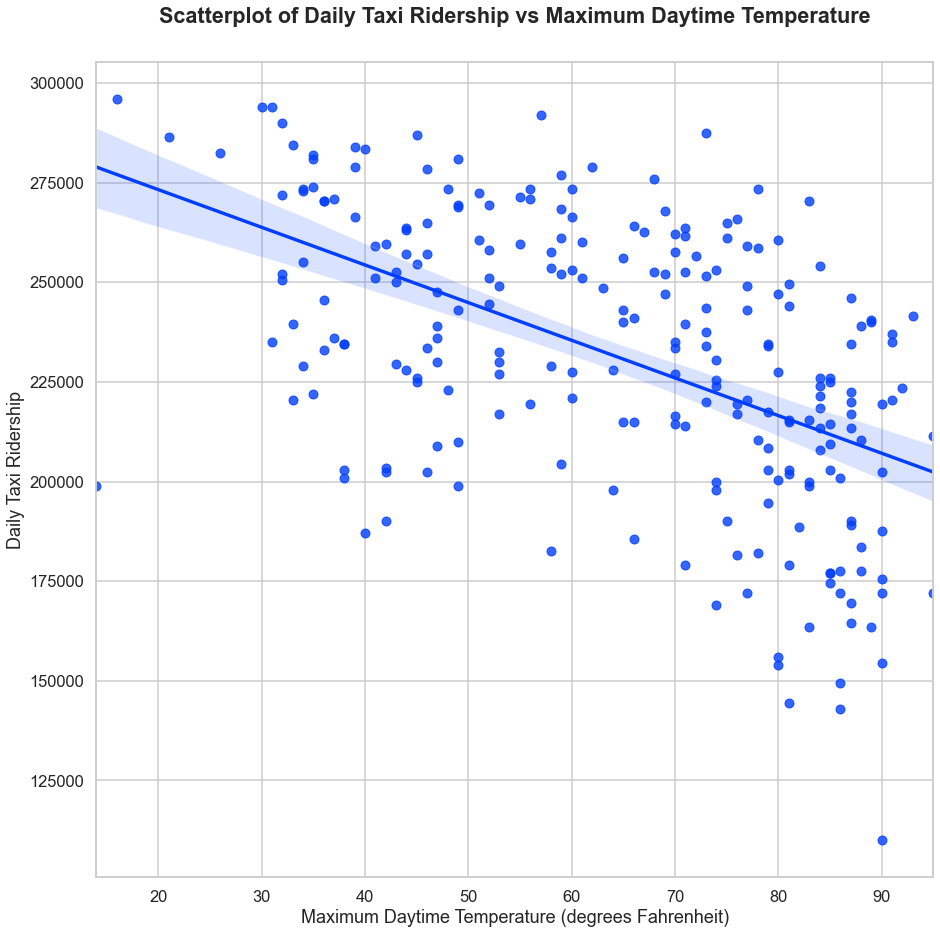

In [34]:
fig, ax = plt.subplots(figsize=(15,15))
sns.regplot(trip_count_weather_by_date_df["maxtemp"],trip_count_weather_by_date_df["trip_count"]).set(ylabel='Daily Taxi Ridership', xlabel="Maximum Daytime Temperature (degrees Fahrenheit)")
ax.set_yticklabels((ax.get_yticks() * 1/0.002).astype(int))
plt.title("Scatterplot of Daily Taxi Ridership vs Maximum Daytime Temperature", fontweight="bold", fontsize="large", y=1.04)
plt.show()

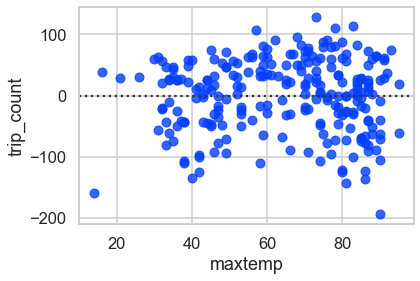

In [31]:
sns.residplot(trip_count_weather_by_date_df["maxtemp"],trip_count_weather_by_date_df["trip_count"])
plt.show()

Looking at the residual plot, the points seem to be randomly dispersed which shows the the linear model is an appropiate model.

### Average Temperature

In [26]:
np.corrcoef(trip_count_weather_by_date_df["avetemp"],trip_count_weather_by_date_df["trip_count"])

array([[ 1.        , -0.53345522],
       [-0.53345522,  1.        ]])

An increase in daily average temperature is correlated with a decrease in daily taxi ridership. There is a moderately strong negative correlation.  

In [27]:
avgTemp_model = LinearRegression().fit(trip_count_weather_by_date_df[["avetemp"]],trip_count_weather_by_date_df[["trip_count"]])
print("Slope:",avgTemp_model.coef_[0],"Intercept:",avgTemp_model.intercept_)

Slope: [-2.00350303] Intercept: [577.1751474]


According to the linear regression model, for every degree increase in aveTemp, the number of trips in a day decreases by ~2.

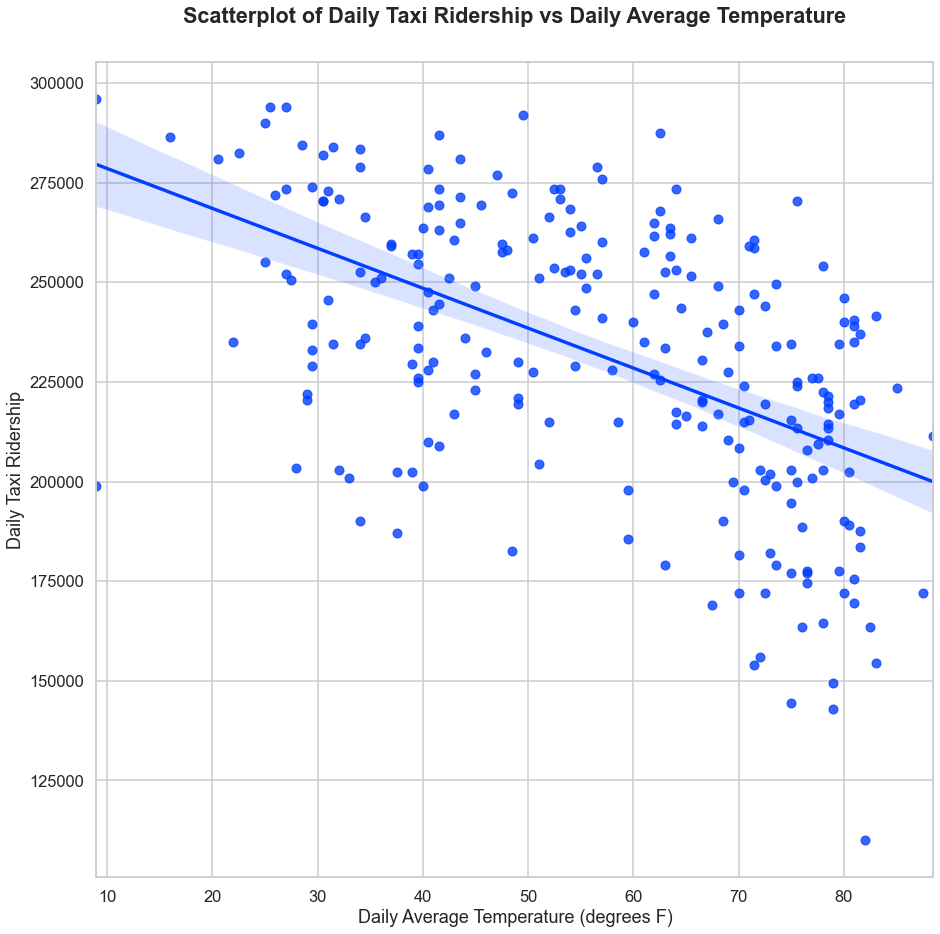

In [25]:
fig,ax=plt.subplots(figsize=(15,15))
sns.regplot(trip_count_weather_by_date_df["avetemp"],trip_count_weather_by_date_df["trip_count"]).set(ylabel='Daily Taxi Ridership', xlabel="Daily Average Temperature (degrees F)")
ax.set_yticklabels((ax.get_yticks() * 1/0.002).astype(int))
plt.title("Scatterplot of Daily Taxi Ridership vs Daily Average Temperature", fontweight="bold", fontsize="large", y=1.04)
plt.show()

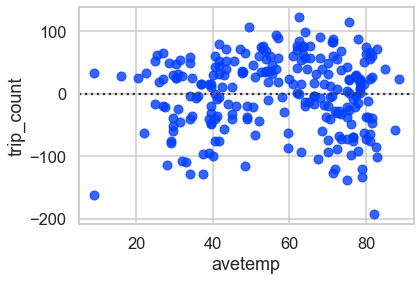

In [30]:
sns.residplot(trip_count_weather_by_date_df["avetemp"],trip_count_weather_by_date_df["trip_count"])
plt.show()

This residual plot seems to be also random. This is expected due to the relationship between average and maximum temperature. The linear model is suitable for this data.

In [33]:
xCols=["aveTemp", "minTemp", "maxTemp"]

def minAIC(X,y):
    variables = X.columns
    model = sm.Logit(y,X[variables]).fit()
    while True:
        print(f'Old model AIC: {model.aic}')
        maxp = np.max(model.pvalues)
        newvariables = variables[model.pvalues < maxp]
        newmodel = sm.Logit(y,X[newvariables]).fit()
        print(f'New model AIC: {newmodel.aic}')
        if newmodel.aic < model.aic:
            model = newmodel
            variables = newvariables
        else:
            break
    return model,variables

X=trip_counts_df[xCols]
X = sm.add_constant(X)
print(f"Initial Variables are {np.array(X.columns)}\n")
y=trip_counts_df["trip_count"]
new_model, logit_variables = minAIC(X, y)
new_model = sm.Logit(y, X[logit_variables]).fit()
print(f"After Optimization, New model AIC is {new_model.aic}\n")
print(f"After Optimization, New Variables are {np.array(new_model.params.index)}")

KeyError: "['aveTemp' 'minTemp' 'maxTemp'] not in index"

# How is Taxi Ridership Correlated with Time of Day?

In [ ]:
# trip_duration_df = df[["pickup_datetime","dropoff_datetime","PULocationID","DOLocationID","pickup_dayofweek"]]

In [ ]:
# trip_time_df["pickup_hour"]=pd.to_datetime(df['pickup_datetime']).dt.hour

In [ ]:
# trip_count_by_hour = trip_time_df.groupby("pickup_hour")["pickup_datetime"].count().to_frame("trip_count_by_hour")
# trip_count_by_hour.reset_index(inplace=True)
# trip_time_df.merge(trip_count_by_hour, how="left", left_on=pd.to_datetime(df['pickup_datetime']).dt.hour, right_on="pickup_hour")

In [ ]:
scaled_daily_df = pd.concat([df]*round(1/0.002/242))
scaled_daily_df.head()

In [ ]:
plt.figure(figsize=(15,10))
g=sns.distplot(pd.to_datetime(scaled_daily_df['pickup_datetime']).dt.hour, bins=np.arange(0,25,1)-0.5, kde=False, hist_kws={"width":0.7, "color":"darkslategray", 'alpha': 0.7})
g.xaxis.grid(b=False)
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Hourly Taxi Ridership on an Average Day")
plt.title("Histogram of Hourly Taxi Rides in an Average Day", fontweight="bold", fontsize="large", y=1.04)
plt.show()

Taxi ridership is lowest in the early morning and peaks at 6pm in an average day. 

In [ ]:
isweekend_df=scaled_daily_df.copy()
isweekend_df["isweekend"]=isweekend_df["pickup_dayofweek"].isin([5,6])
isweekend_df[["pickup_dayofweek","isweekend"]]

In [ ]:
isweekend_y_df=isweekend_df[isweekend_df["isweekend"]==True]
isweekend_n_df=isweekend_df[isweekend_df["isweekend"]==False]

# accounting for how isweekend_df["isweekend"]==True occurs 2/7 of the time
scaled_isweekend_y_df = pd.concat([isweekend_y_df]*5)
scaled_isweekend_n_df = pd.concat([isweekend_n_df]*2)

In [ ]:
# f, axes = plt.subplots(1, 2, figsize=(20, 20), sharex=True)
plt.figure(figsize=(15,10))
sns.distplot(pd.to_datetime(isweekend_y_df['pickup_datetime']).dt.hour, bins=np.arange(0,25,2)-0.5, hist=False, label="weekend", kde_kws={"color":"deeppink", 'alpha': 0.7})
sns.distplot(pd.to_datetime(isweekend_n_df['pickup_datetime']).dt.hour, bins=np.arange(0,25,2)-0.5, hist=False,  label="weekday", kde_kws={"color":"darkslategray", 'alpha': 0.7})
plt.xticks(np.arange(0,25,2), labels=["12am-2am","2am-4am","4am-6am","6am-8am","8am-10am","10am-12pm","12pm-2pm","2pm-4pm","4pm-6pm","6pm-8pm","8pm-10pm","10pm-12am"], rotation=30)
plt.xlabel("Time of Day")
plt.ylabel("Density of Hourly Taxi Rides")
plt.legend()
plt.title("KDE Plot of Hourly Taxi Rides on a Weekend/Weekday", fontweight="bold", fontsize="large", y=1.04)
plt.show()


On weekends, a higher fraction of taxi rides occur in the early hours of the morning (12-4am), perhaps due to the crowd returning from parties. On weekdays, a higher fraction of rides occur in the mid-morning (8-10am) and early evening (6-8pm) as people commute to and from work. 

In [ ]:
plt.figure(figsize=(15,10))
g=sns.lineplot(pd.to_datetime(df['pickup_datetime']).dt.hour, df["trip_duration_mins"])
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Ride Duration (mins)")
plt.title("Lineplot of Average Duration of Taxi Rides in a Day", fontweight="bold", fontsize="large", y=1.04)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
g=sns.lineplot(pd.to_datetime(df['pickup_datetime']).dt.hour, df["trip_distance"])
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Ride Distance (miles)")
plt.title("Lineplot of Average Distance of Taxi Rides in a Day", fontweight="bold", fontsize="large", y=1.04)
plt.show()

In [ ]:
df[df["trip_duration_mins"]==0]["trip_distance"]

In [ ]:
positive_trip_duration_df=df[df["trip_duration_mins"]>0]

In [ ]:
plt.figure(figsize=(15,10))
g=sns.lineplot(pd.to_datetime(positive_trip_duration_df['pickup_datetime']).dt.hour, positive_trip_duration_df["trip_distance"]/(positive_trip_duration_df["trip_duration_mins"]/60))
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Average Taxi Speed (mph)")
plt.title("Lineplot of Average Taxi Speed in a Day", fontweight="bold", fontsize="large", y=1.04)
plt.show()

Average taxi speed is much higher in the early morning hours (around 4am). Therefore, even though these early-morning trips tend to be longer in distance, they last about the same duration as shorter-distance (but much slower) taxi trips around noon. 

In [ ]:
isweekend_df=positive_trip_duration_df.copy()
isweekend_df["isweekend"]=isweekend_df["pickup_dayofweek"].isin([5,6])
isweekend_df['isweekend'] = isweekend_df['isweekend'].map({False: 'weekday', True: 'weekend'})
isweekend_df[["pickup_dayofweek","isweekend"]]

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(pd.to_datetime(isweekend_df['pickup_datetime']).dt.hour, isweekend_df["trip_distance"]/(isweekend_df["trip_duration_mins"]/60), hue=isweekend_df["isweekend"], hue_order=["weekend","weekday"], err_style=None, palette=sns.color_palette(palette = ["deeppink", "darkslategray"]))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.xticks(np.arange(0,26, 2), labels=["12am","2am","4am","6am","8am","10am","12pm","2pm","4pm","6pm","8pm","10pm"])
plt.xlabel("Time of Day")
plt.ylabel("Average Taxi Speed (mph)")
plt.title("Lineplot of Average Taxi Speed in a Day on Weekend/Weekday", fontweight="bold", fontsize="large", y=1.04)
plt.show()

# Other Correlations in the Data

In [ ]:
df[["tip_amount","fare_amount","pickup_dayofweek","trip_duration_mins","trip_distance",'payment_type',"passenger_count","precipitation"]].corr()

In [ ]:
df.columns

In [ ]:
taxi_zone_lookup_df = pd.read_csv("taxi_zone_lookup.csv")
taxi_zone_lookup_df.head()

In [ ]:
location_df=df.copy()[['pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID','fare_amount','passenger_count', 'payment_type','tip_amount', 'tolls_amount', 'total_amount','trip_distance', 'pickup_dayofweek', 'trip_duration_mins', 'date']]

In [ ]:
lagg_df=location_df.merge(taxi_zone_lookup_df,how="left",left_on=location_df["PULocationID"], right_on=taxi_zone_lookup_df["LocationID"])
lagg_df.rename(columns={"Borough":"PUborough","Zone":"PUzone","service_zone":"PUservice_zone","manhattan_zone":"PUmanhattan_zone"},inplace=True)
lagg_df.drop(columns=["key_0","LocationID"],inplace=True)
lagg_df=lagg_df.merge(taxi_zone_lookup_df,how="left",left_on=lagg_df["DOLocationID"], right_on=taxi_zone_lookup_df["LocationID"])
lagg_df.rename(columns={"Borough":"DOborough","Zone":"DOzone","service_zone":"DOservice_zone","manhattan_zone":"DOmanhattan_zone"},inplace=True)
lagg_df.drop(columns=["key_0","LocationID"],inplace=True)
lagg_df

In [ ]:
pu_manhattan_df=lagg_df[~pd.isnull(lagg_df["PUmanhattan_zone"])]

In [ ]:
do_manhattan_df=lagg_df[~pd.isnull(lagg_df["PUmanhattan_zone"])]

In [ ]:
pu_manhattan_df.corr()

# What can Pickup and Dropoff Locations Tell Us?

In [ ]:
fig,axes=plt.subplots(1,2, figsize=(20,12))

sns.barplot(pu_manhattan_df["PUmanhattan_zone"], pu_manhattan_df["tip_amount"], order=["Uptown", "Midtown", "Lower-Midtown", "Downtown"], ci=None, ax=axes[0], palette=sns.color_palette("Blues")).set(ylabel='Average Tip Amount', xlabel="Pickup Location in Manhattan")

sns.barplot(do_manhattan_df["DOmanhattan_zone"], do_manhattan_df["tip_amount"], order=["Uptown", "Midtown", "Lower-Midtown", "Downtown"], ci=None, ax=axes[1],  palette=sns.color_palette("OrRd")).set(ylabel='Average Tip Amount', xlabel="Dropoff Location in Manhattan")

fig.suptitle('Bar Charts of Average Tip Amount by Pickup/Dropoff Location in Manhattan', fontsize="x-large", fontweight="bold", y=0.96)
plt.show()

Rides with pickups or dropoffs in the Downtown area of Manhattan consistently yield a higher tip amount. 

In [ ]:
location_pairs_df = df.groupby(["PULocationID","DOLocationID"]).size().to_frame("Count")
location_pairs_df.sort_values(by="Count", ascending=False).head(30)

In [ ]:
df[df["DOLocationID"]==73][["pickup_datetime","dropoff_datetime","trip_distance","trip_duration_mins","pickup_dayofweek"]].head(40)

In [ ]:
# How is Taxi Ridership Correlated with Weather?

In [ ]:
df[df["tip_amount"]>0][["tip_amount"]]

In [ ]:
df.columns